### K - Means clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

In [2]:
df =pd.read_csv('Live.csv')

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(7050, 16)

In [5]:
df.count

<bound method DataFrame.count of                               status_id status_type status_published  \
0      246675545449582_1649696485147474       video   4/22/2018 6:00   
1      246675545449582_1649426988507757       photo  4/21/2018 22:45   
2      246675545449582_1648730588577397       video   4/21/2018 6:17   
3      246675545449582_1648576705259452       photo   4/21/2018 2:29   
4      246675545449582_1645700502213739       photo   4/18/2018 3:22   
...                                 ...         ...              ...   
7045  1050855161656896_1061863470556065       photo   9/24/2016 2:58   
7046  1050855161656896_1061334757275603       photo  9/23/2016 11:19   
7047  1050855161656896_1060126464063099       photo  9/21/2016 23:03   
7048  1050855161656896_1058663487542730       photo   9/20/2016 0:43   
7049  1050855161656896_1050858841656528       photo  9/10/2016 10:30   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529  

In [6]:
print(df.duplicated().sum())

51


In [7]:
print(df.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [8]:
df.drop(['Column1', 'Column2', 'Column3','Column4'], axis=1, inplace=True)

In [9]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [14]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [11]:
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], shape=(6997,), dtype=object)

In [12]:
df['status_published'].unique()
len(df['status_published'].unique())

6913

In [13]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [14]:
len(df['status_type'].unique())

4

In [15]:
df.drop(['status_id', 'status_published'],axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [17]:
df.shape

(7050, 10)

In [18]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [19]:
X = df
y = df['status_type']

### Convert catagorical variable into integers

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

### View the summary of X

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [22]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


### Feature Scaling

In [25]:
cols = X.columns

In [27]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [28]:
X = pd.DataFrame(X, columns=[cols])

In [29]:
print(X)

     status_type num_reactions num_comments num_shares num_likes num_loves  \
0       1.000000      0.112314     0.024393   0.076519  0.091720  0.140030   
1       0.333333      0.031847     0.000000   0.000000  0.031847  0.000000   
2       1.000000      0.048195     0.011243   0.016647  0.043312  0.031963   
3       0.333333      0.023567     0.000000   0.000000  0.023567  0.000000   
4       0.333333      0.045223     0.000000   0.000000  0.043312  0.013699   
...          ...           ...          ...        ...       ...       ...   
7045    0.333333      0.018896     0.000000   0.000000  0.018896  0.000000   
7046    0.333333      0.003397     0.000000   0.000000  0.002972  0.001522   
7047    0.333333      0.000425     0.000000   0.000000  0.000212  0.001522   
7048    0.333333      0.074522     0.000572   0.006425  0.074098  0.003044   
7049    0.333333      0.003609     0.000000   0.000000  0.003609  0.000000   

      num_wows num_hahas  num_sads num_angrys  
0     0.010791 

In [31]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### k-Means model with 2 clusters

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [ ]:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

In [35]:
kmeans.inertia_

237.75726404419547

### The lesser the model inertia, the better the model fit

## Check quality of weak classification by the model

In [36]:
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4288 out of 7050 samples were correctly labeled.


In [39]:
print('Accuracy score: {0:0.2f}' . format(correct_labels/float(y.size)))

Accuracy score: 0.61


## Use Elbow method 

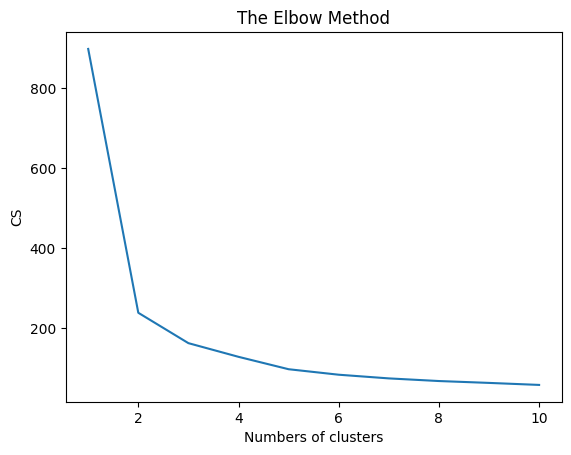

In [43]:
from sklearn.cluster import KMeans
cs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title('The Elbow Method')
plt.xlabel('Numbers of clusters')
plt.ylabel('CS')
plt.show()
   

In [46]:
# from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}' . format(correct_labels/float(y.size)))

Result: 4066 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


In [49]:
kmeans.inertia_

96.24989550305202

In [47]:
# from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}' . format(correct_labels/float(y.size)))

Result: 4112 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


In [50]:
kmeans.inertia_

96.24989550305202

In [48]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}' . format(correct_labels/float(y.size)))

Result: 4080 out of 7050 samples were correctly labeled.
Accuracy score: 0.58
